## Bank 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree
import pydotplus

from IPython.display import Image
from six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

### Load Dataset

In [2]:
column_names=["age","job","marital","education","default", "balance","housing","loan","contact","day","month","duration","campaign","pdays","poutcome","y"]
df_bank= pd.read_csv("dataset/bank.csv", delimiter= ';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df_bank.shape

(4521, 17)

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df_bank['job'] = df_bank['job'].astype({'job':'category'})
df_bank['marital'] = df_bank['marital'].astype({'marital':'category'})
df_bank['education'] = df_bank['education'].astype({'education':'category'})
df_bank['default'] = df_bank['default'].astype({'default':'category'})
df_bank['housing'] = df_bank['housing'].astype({'housing':'category'})
df_bank['loan'] = df_bank['loan'].astype({'loan':'category'})
df_bank['contact'] = df_bank['contact'].astype({'contact':'category'})
df_bank['month'] = df_bank['month'].astype({'month':'category'})
df_bank['poutcome'] = df_bank['poutcome'].astype({'poutcome':'category'})
df_bank['y'] = df_bank['y'].astype({'y':'category'})

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


In [8]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Visualize dataset

Text(0.5, 1.0, 'Deposit berdasarkan umur')

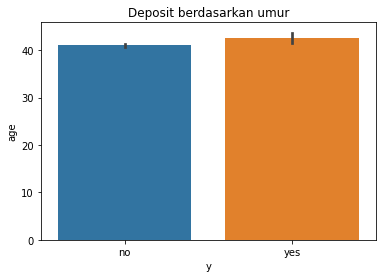

In [10]:
sns.barplot(x = 'y',y='age', data = df_bank)
plt.title("Deposit berdasarkan umur")

Text(0.5, 1.0, 'Deposit berdasarkan balance')

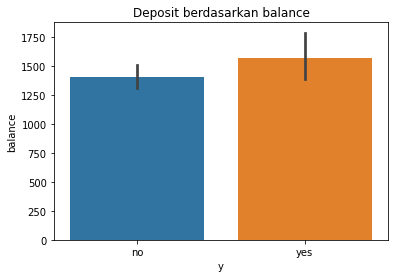

In [11]:
sns.barplot(x = 'y',y='balance', data = df_bank)
plt.title("Deposit berdasarkan balance")

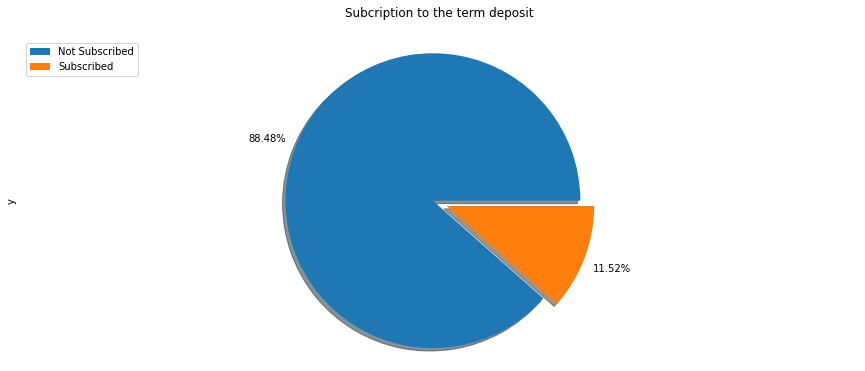

In [12]:
# Visualisai Pie chart
labels= ["Not Subscribed", "Subscribed"]
explode =(0, 0.1)
jumlah = df_bank["y"].value_counts()


jumlah.plot(
    kind="pie",
    figsize=(15,6),
    autopct="%1.2f%%",
    labels=None,
    pctdistance=1.2,
    shadow=True,
    explode= explode

)

plt.axis("equal")
plt.title("Subcription to the term deposit\n")
plt.legend(labels, loc="upper left")
plt.show()

berdasarkan plot di atas dapat diketahui bahwa sebagian besar banyak orang tidak melakukan deposit terhadap bank tersebut.

In [13]:
# we will groupby then count
df_bank.groupby(['campaign'])['y'].count().reset_index().sort_values(by="y",ascending=False).iloc[:5]

,campaign,y
0,1,1734
1,2,1264
2,3,558
3,4,325
4,5,167


Text(0, 0.5, 'Frequency of Purchase')

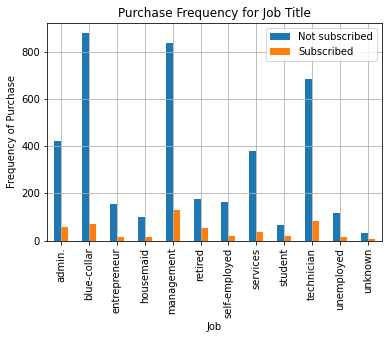

In [14]:
table =pd.crosstab(df_bank.job, df_bank.y)
table.columns = ["Not subscribed", "Subscribed"]
table.plot(kind='bar')

plt.grid(True)

plt.title("Purchase Frequency for Job Title")
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [15]:
table = pd.crosstab(df_bank.job, df_bank.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed','subscribed']
table.sort_values(by=['subscribed'], ascending = False).loc[:,'subscribed']

job
retired          23.48
student          22.62
unknown          18.42
management       13.52
housemaid        12.50
admin.           12.13
self-employed    10.93
technician       10.81
unemployed       10.16
services          9.11
entrepreneur      8.93
blue-collar       7.29
Name: subscribed, dtype: float64

berdasarkan hal tersebut target nasabahnya adalah blue collar, admin, teknisi. Sedangkan frekuensi siswa dan pensiunan yang berlangganan term deposit cukup tinggi (22,62% untuk siswa dan 23,48% untuk pensiunan) 

#### Role of marital status in subscription behaviour

Text(0, 0.5, 'Proportion of Customers')

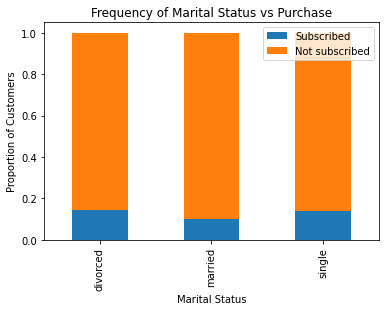

In [16]:
table = pd.crosstab(df_bank.marital,df_bank.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

dari hasil plot di atas bahwa marital status tidak memberikan pengaruh iya dan tidaknya dalam melakukan deposit.

### Replace into numerical
untuk mempermudah training dataset dibutuhkan mengubah semua data yang masih bersifat kategorial menjadi numerical

In [17]:
df_bank['job']= df_bank['job'].replace({'entrepreneur':1, 'management':2,'technician':3,'admin.':4,'services':5, 'self-employed':6,'blue-collar':7,'retired':8,'unemployed':9,'housemaid':10,'student':11,'unknown':12})
df_bank['education'] = df_bank['education'].replace({'primary':1,'secondary':2,'tertiary':3,'unknown':4})
df_bank['housing'] = df_bank['housing'].replace({'yes':1, 'no':0})
df_bank['default'] = df_bank['default'].replace({'yes':1, 'no':0})
df_bank['loan'] = df_bank['loan'].replace({'yes':1, 'no':0})
df_bank['y'] = df_bank['y'].replace({'yes':1, 'no':0})

In [18]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,married,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,5,married,2,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,2,single,3,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,2,married,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,7,married,2,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,5,married,2,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,6,married,3,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,3,married,2,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,7,married,2,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [19]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   int64   
 2   marital    4521 non-null   category
 3   education  4521 non-null   int64   
 4   default    4521 non-null   int64   
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   int64   
 7   loan       4521 non-null   int64   
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   int64   
dtypes: category(4), int64(13)
memory usage: 477.8 KB


## Splitting dataset in Training and Test

In [20]:
df_bank = df_bank.drop(columns=['marital', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'])

In [21]:
X = df_bank.drop(columns=['y'])
y = df_bank['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print(y_train.value_counts())
print()
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print(y_test.value_counts())

Number transactions X_train dataset:  (3616, 7)
Number transactions y_train dataset:  (3616,)
0    3191
1     425
Name: y, dtype: int64

Number transactions X_test dataset:  (905, 7)
Number transactions y_test dataset:  (905,)
0    809
1     96
Name: y, dtype: int64


## Logistic Regression
training dan test dataset menggunakan algoritma logistic regression

In [22]:
# membuat variable x dan y
X = df_bank.drop('y', axis=1)
y = df_bank['y']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,
                                                    stratify=y,
                                                    random_state =1)

In [24]:
model= LogisticRegression(solver="saga",random_state=11)
model.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(random_state=11, solver='saga')

In [25]:
model.score(X_train, y_train)

0.8606194690265486

In [26]:
model.fit(X_test, y_test)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(random_state=11, solver='saga')

In [27]:
model = model.predict(X_test)
print(classification_report(model, y_test, target_names=["Not Subscribed","Subscribed"]))

                precision    recall  f1-score   support

Not Subscribed       0.92      0.88      0.90       834
    Subscribed       0.08      0.11      0.09        71

      accuracy                           0.82       905
     macro avg       0.50      0.50      0.50       905
  weighted avg       0.86      0.82      0.84       905



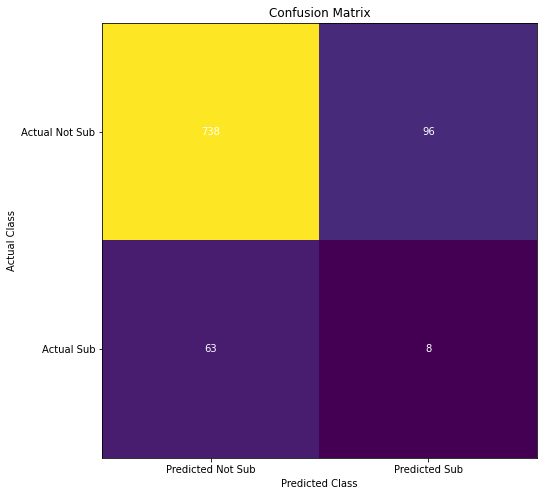

In [28]:
cm = confusion_matrix(model, y_test)

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.yaxis.set(ticks=range(2), ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=range(2), ticklabels=("Predicted Not Sub", "Predicted Sub"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(accuracy_score(model, y_test))
matrix = confusion_matrix(model, y_test)
print(matrix)

0.8243093922651934
[[738  96]
 [ 63   8]]


Accuracy score untuk linear regression hanya sebesar 0.82

## K Nearest Neighbors
mengimplementasikan K-Nearest Neighbors untuk dataset bank

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.score(X_train, y_train)

0.8962942477876106

In [32]:
knn.fit(X_test, y_test)
knn.score(X_test, y_test)

0.901657458563536

In [33]:
knn_pred = knn.predict(X_test)
print(classification_report(knn_pred,y_test,target_names=["Not Subscribed","Subscribed"]))

                precision    recall  f1-score   support

Not Subscribed       0.98      0.91      0.95       860
    Subscribed       0.29      0.67      0.40        45

      accuracy                           0.90       905
     macro avg       0.63      0.79      0.67       905
  weighted avg       0.95      0.90      0.92       905



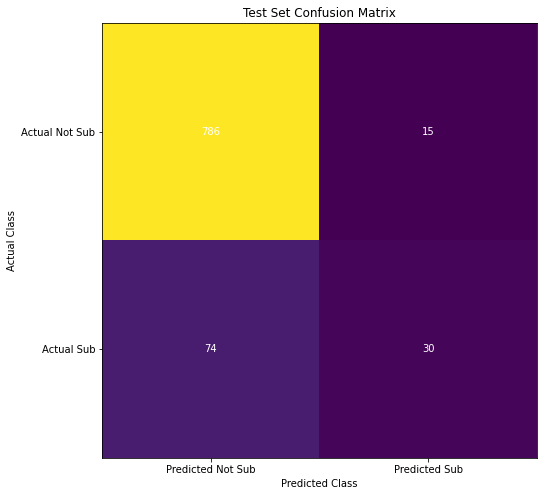

In [34]:
cm = confusion_matrix(y_test, knn_pred) #3 adalah true negativenya, 1 negative diprediksi positve
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.yaxis.set(ticks=range(2),ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=range(2),ticklabels=("Predicted Not Sub", "Predicted Sub"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Test Set Confusion Matrix")
plt.show()

In [35]:
print(accuracy_score(y_test, knn_pred))
matrix1 = confusion_matrix(y_test, knn_pred)
print(matrix1)

0.901657458563536
[[786  15]
 [ 74  30]]


hasil accuracy model KNN sebesar 0.9

In [36]:
errors=[]
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = np.mean(pred == y_test)
    error = np.mean(pred !=y_test)
    accuracies.append(accuracy)
    errors.append(error)

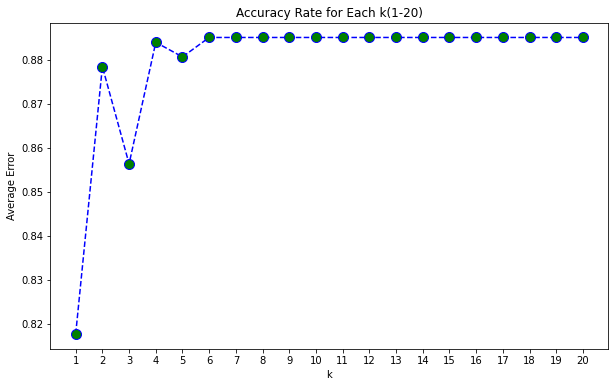

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),accuracies, color="blue", linestyle="dashed", marker="o", markerfacecolor="green", markersize =10)
plt.title("Accuracy Rate for Each k(1-20)")
plt.xlabel("k")
plt.xticks(range(1,21))
plt.ylabel("Average Error")
plt.show()

tingkat akurasi yang paling rendah adalah k=1

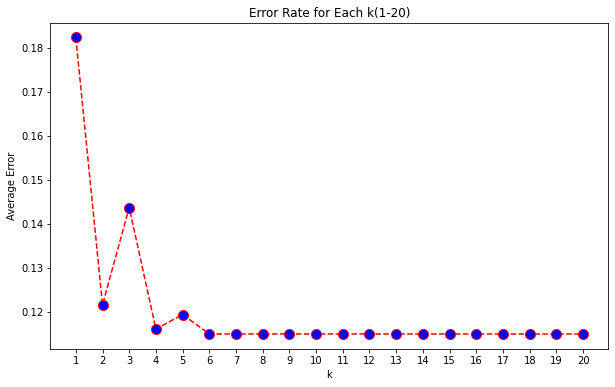

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),errors, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize =10)
plt.title("Error Rate for Each k(1-20)")
plt.xlabel("k")
plt.xticks(range(1,21))
plt.ylabel("Average Error")
plt.show()

error yang paling tinggi adalah 1 dengan nilai di atas 0.18.

## Decision Tree Classifier
mengimplementasikan decision tree terhadap dataset

In [39]:
print("Training size :", X_train.shape)
print(y_train.value_counts())
print()
print("Test Size:", X_test.shape)
print(y_test.value_counts())


Training size : (3616, 7)
0    3199
1     417
Name: y, dtype: int64

Test Size: (905, 7)
0    801
1    104
Name: y, dtype: int64


In [40]:
417/4416, 104/905 #class 1 proportion in each training and test set

(0.09442934782608696, 0.11491712707182321)

In [41]:
decstree_model = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=10)
decstree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)

In [42]:
decstree_score_train = decstree_model.score(X_train, y_train)
decstree_score_train

0.8877212389380531

In [43]:
decstree_model.fit(X_test, y_test)
decstree_score_test = decstree_model.score(X_test,y_test)
decstree_score_test

0.8939226519337017

In [44]:
print("test accuracy")
y_pred = decstree_model.predict(X_test)
print(classification_report(y_pred,y_test))


print("training accuracy")
y_pred_train = decstree_model.predict(X_train)
print(classification_report(y_pred_train,y_train))

test accuracy
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       865
           1       0.23      0.60      0.33        40

    accuracy                           0.89       905
   macro avg       0.61      0.75      0.64       905
weighted avg       0.95      0.89      0.92       905

training accuracy
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      3445
           1       0.12      0.30      0.18       171

    accuracy                           0.87      3616
   macro avg       0.54      0.60      0.55      3616
weighted avg       0.92      0.87      0.89      3616



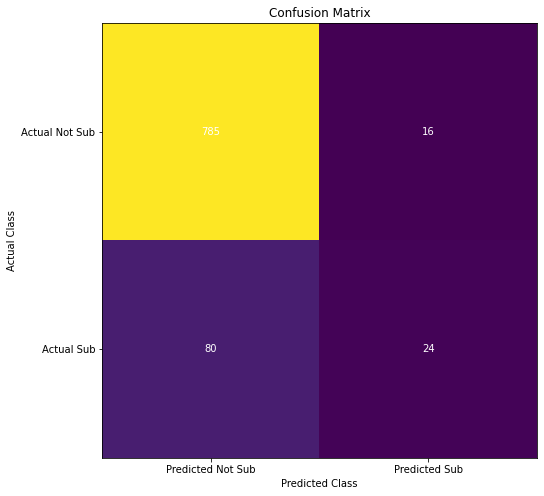

In [45]:
cm = confusion_matrix(y_test, y_pred)

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.yaxis.set(ticks=range(2),ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=range(2),ticklabels=("Predicted Not Sub", "Predicted Sub"))
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [46]:
cm

array([[785,  16],
       [ 80,  24]], dtype=int64)

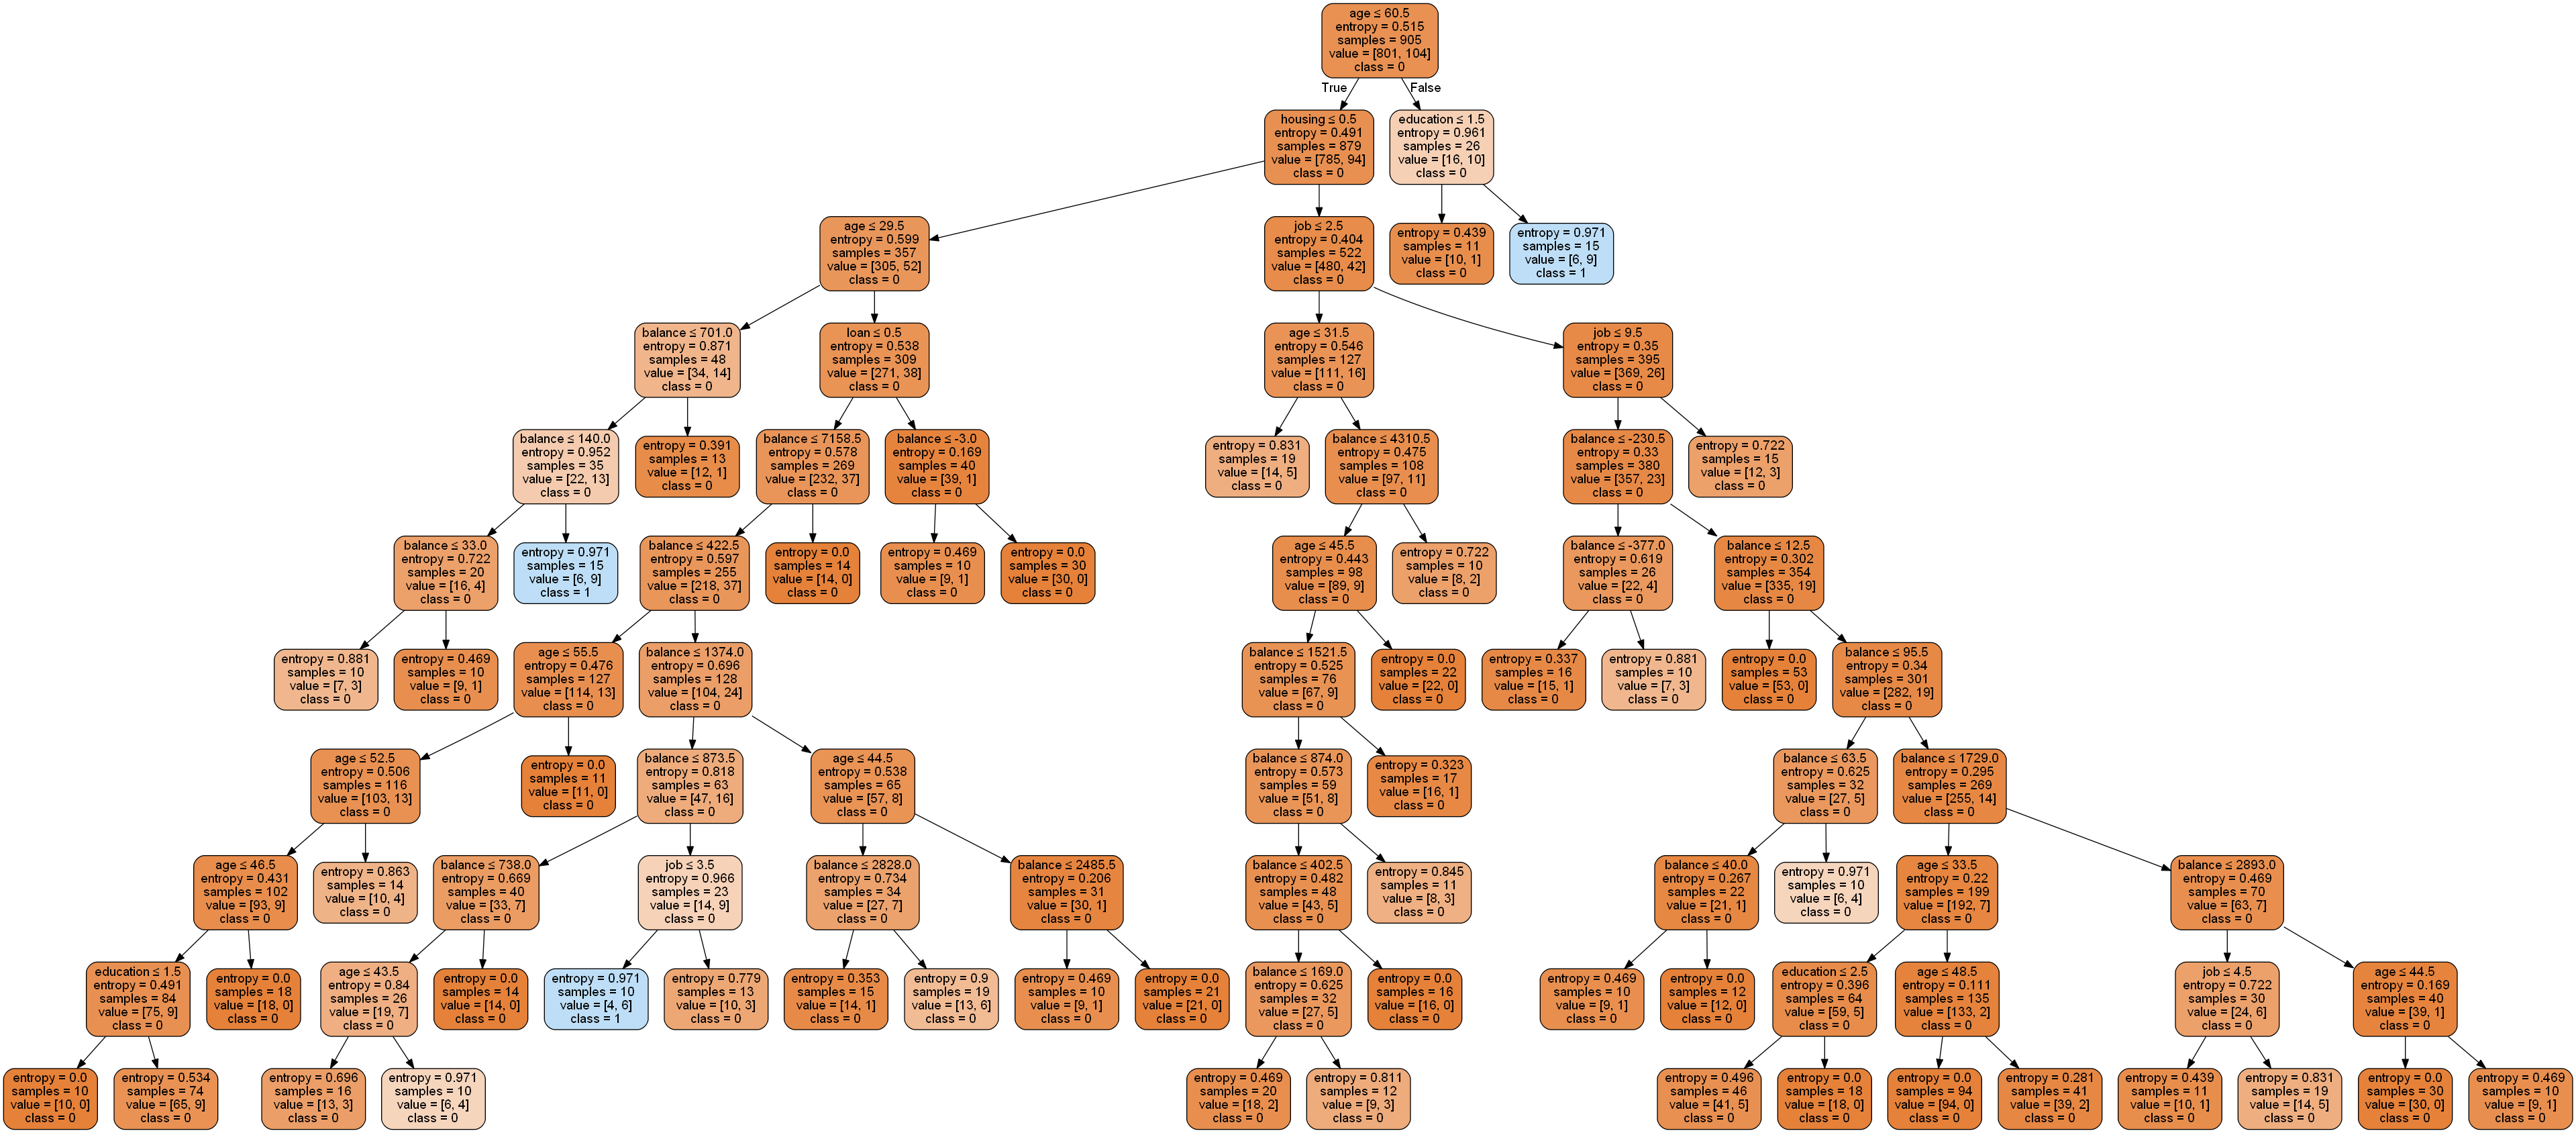

In [47]:
dot_data = StringIO()
tree.export_graphviz(
    decstree_model,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=df_bank.drop(columns="y").columns,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [48]:
print(accuracy_score(y_test, y_pred))
matrix2 = confusion_matrix(y_test, y_pred)
print(matrix2)

0.8939226519337017
[[785  16]
 [ 80  24]]


Accuracy score yang didapat  sebesar 0.89

## Random Forest

In [49]:
Rf_model = RandomForestClassifier(n_estimators=10, max_depth=10)
Rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [50]:
Rf_score_training = Rf_model.score(X_train,y_train)
print("Training score:", Rf_score_training)

Rf_score_test = Rf_model.score(X_test, y_test)
print("Test score:", Rf_score_test)

print("\nTest prediction")
predictions_rf = Rf_model.predict(X_test)
print(classification_report(y_test, predictions_rf))

print("\nTraining")
predictions_rf_train = Rf_model.predict(X_train)
print(classification_report(y_train, predictions_rf_train))

Training score: 0.9001659292035398
Test score: 0.8773480662983425

Test prediction
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       801
           1       0.11      0.01      0.02       104

    accuracy                           0.88       905
   macro avg       0.50      0.50      0.48       905
weighted avg       0.80      0.88      0.83       905


Training
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3199
           1       0.95      0.14      0.25       417

    accuracy                           0.90      3616
   macro avg       0.93      0.57      0.60      3616
weighted avg       0.91      0.90      0.87      3616



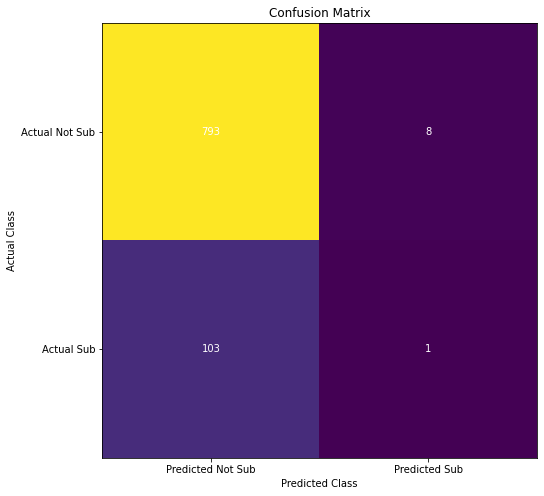

In [51]:
cm = confusion_matrix(y_test, predictions_rf)

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.yaxis.set(ticks=range(2),ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=range(2),ticklabels=("Predicted Not Sub", "Predicted Sub"))
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(accuracy_score(y_test, predictions_rf))
matrix3 = confusion_matrix(y_test, predictions_rf)
print(matrix3)

0.8773480662983425
[[793   8]
 [103   1]]


Accuracy untuk model Random Forest adalah 0.88

In [53]:
feature_importances = pd.Series(Rf_model.feature_importances_)
feature_importances

0    0.294783
1    0.135086
2    0.064878
3    0.010945
4    0.430022
5    0.043510
6    0.020777
dtype: float64

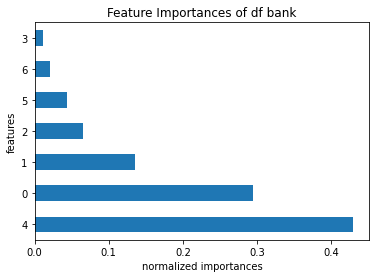

In [54]:
feature_importances.sort_values(ascending=False).plot(kind="barh")
plt.title("Feature Importances of df bank")
plt.xlabel("normalized importances")
plt.ylabel("features")
plt.show()

**Features dataset bank adalah:**
- 0   age        
- 1   job       
- 2   education 
- 3   default   
- 4   balance   
- 5   housing   
- 6   loan   
Features dataset bank terbaik adalah balance

## Ensamble

In [55]:
rfclass = RandomForestClassifier(n_estimators =50, max_depth=10)
rfclass.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [56]:
rfclass.fit(X_test, y_test)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [57]:
Rf_score_train = rfclass.score(X_train, y_train)
print("Rf score training :", Rf_score_train)

Rf_score_tst = rfclass.score(X_test, y_test)
print("Rf score test :", Rf_score_tst)

Rf score training : 0.8797013274336283
Rf score test : 0.9259668508287293


In [58]:
rf_pred_ens = rfclass.predict(X_test)
print(classification_report(y_test, rf_pred_ens))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       801
           1       1.00      0.36      0.52       104

    accuracy                           0.93       905
   macro avg       0.96      0.68      0.74       905
weighted avg       0.93      0.93      0.91       905



In [59]:
adabo = AdaBoostClassifier(n_estimators=50, learning_rate=1.,random_state=22)
adabo.fit(X_train, y_train)

AdaBoostClassifier(random_state=22)

In [60]:
Ad_score_train = adabo.score(X_train, y_train)
Ad_score_train

0.8860619469026548

In [61]:
adabo.fit(X_test, y_test)

AdaBoostClassifier(random_state=22)

In [62]:
Ad_score_test = adabo.score(X_test, y_test)
Ad_score_test 

0.8895027624309392

In [63]:
adabo_pred = adabo.predict(X_test)
print(classification_report(y_test, adabo_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       801
           1       0.75      0.06      0.11       104

    accuracy                           0.89       905
   macro avg       0.82      0.53      0.52       905
weighted avg       0.87      0.89      0.85       905



In [64]:
bagg_cl = BaggingClassifier(n_estimators =50)
bagg_cl.fit(X_train, y_train)
bagg_score_train = bagg_cl.score(X_train, y_train)
print("bagging score train:", bagg_score_train)

bagging score train: 0.9944690265486725


In [65]:
bagg_cl.fit(X_test,y_test)
bagg_score_test = bagg_cl.score(X_test, y_test)
bagg_score_test

0.9988950276243094

In [66]:
bagg_pred= bagg_cl.predict(X_test)
print(classification_report(bagg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       0.99      1.00      1.00       103

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



## SVM

In [67]:
svm_bank = SVC()
svm_bank.fit(X_train, y_train)
svm_bank.fit(X_test, y_test)

SVC()

In [68]:
svm_bank_score_train = svm_bank.score(X_train, y_train)
print("SVM score training :", svm_bank_score_train)

svm_bank_score_tst = svm_bank.score(X_test, y_test)
print("SVM score test :", svm_bank_score_tst)

SVM score training : 0.884679203539823
SVM score test : 0.8850828729281768


In [69]:
svm_pred = svm_bank.predict(X_test)
svm_pred_train = svm_bank.predict(X_train)
print("Testing")
print(classification_report(y_test, svm_pred))
print()
print("Training")
print(classification_report(y_train, svm_pred_train))

Testing
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       801
           1       0.00      0.00      0.00       104

    accuracy                           0.89       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.78      0.89      0.83       905


Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3199
           1       0.00      0.00      0.00       417

    accuracy                           0.88      3616
   macro avg       0.44      0.50      0.47      3616
weighted avg       0.78      0.88      0.83      3616



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [70]:
print(accuracy_score(y_test, svm_pred))
matrix4 = confusion_matrix(y_test, svm_pred)
print(matrix4)

0.8850828729281768
[[801   0]
 [104   0]]


nilai accuracy model untuk model SVM adalah 0.89

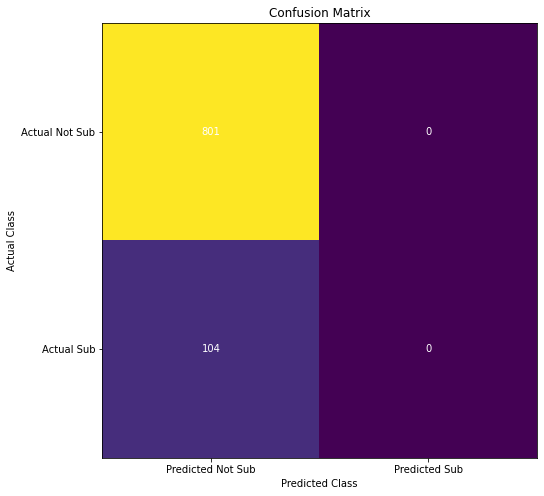

In [71]:
cm = confusion_matrix(y_test, svm_pred)

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.yaxis.set(ticks=range(2),ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=range(2),ticklabels=("Predicted Not Sub", "Predicted Sub"))
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

## Naive Bayes

In [72]:
gaussianNB_bank = GaussianNB()
gaussianNB_bank.fit(X_train, y_train)
gaussianNB_bank.fit(X_test, y_test)

GaussianNB()

In [73]:
gaussianNB_bank_score_train = gaussianNB_bank.score(X_train, y_train)
print("Gaussian NB score training :", gaussianNB_bank_score_train)

gaussianNB_bank_score_tst = gaussianNB_bank.score(X_test, y_test)
print("Gaussian NB score test :", gaussianNB_bank_score_tst)

Gaussian NB score training : 0.8725110619469026
Gaussian NB score test : 0.8696132596685083


In [74]:
gaussianNB_bank_pred = gaussianNB_bank.predict(X_test)
gaussianNB_bank_pred_train = gaussianNB_bank.predict(X_train)
print("Testing accuracy:", accuracy_score(y_test,gaussianNB_bank_pred))
print(classification_report(y_test, gaussianNB_bank_pred))
print()
print("training accuracy:", accuracy_score(y_train,gaussianNB_bank_pred_train))
print(classification_report(y_train, gaussianNB_bank_pred_train))

Testing accuracy: 0.8696132596685083
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       801
           1       0.33      0.13      0.19       104

    accuracy                           0.87       905
   macro avg       0.61      0.55      0.56       905
weighted avg       0.83      0.87      0.84       905


training accuracy: 0.8725110619469026
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3199
           1       0.32      0.09      0.14       417

    accuracy                           0.87      3616
   macro avg       0.60      0.53      0.54      3616
weighted avg       0.83      0.87      0.84      3616



In [75]:
print(accuracy_score(y_test, gaussianNB_bank_pred))
matrix5 = confusion_matrix(y_test,gaussianNB_bank_pred)
print(matrix5)

0.8696132596685083
[[773  28]
 [ 90  14]]


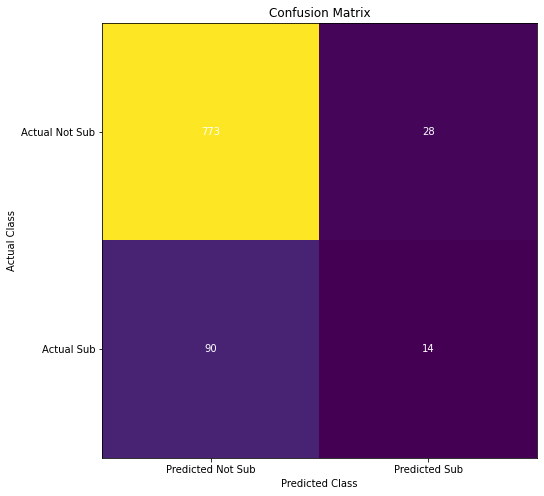

In [76]:
cm = confusion_matrix(y_test, gaussianNB_bank_pred)

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel("Actual Class")
ax.set_xlabel("Predicted Class")
ax.yaxis.set(ticks=range(2),ticklabels=("Actual Not Sub", "Actual Sub"))
ax.xaxis.set(ticks=range(2),ticklabels=("Predicted Not Sub", "Predicted Sub"))
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

Accuracy score dari model Naive Bayes sebesar 0.87

## Hasil Accuracy setiap model

In [77]:
print("Logistic Regression:",accuracy_score(y_test,model))
print("KNN:",accuracy_score(knn_pred,y_test))
print("Decision Tree:",accuracy_score(y_pred,y_test))
print("Random Forest:",accuracy_score(y_test, predictions_rf))
print("SVM:",accuracy_score(y_test, svm_pred))
print("Naive Bayes:",accuracy_score(y_test,gaussianNB_bank_pred))

Logistic Regression: 0.8243093922651934
KNN: 0.901657458563536
Decision Tree: 0.8939226519337017
Random Forest: 0.8773480662983425
SVM: 0.8850828729281768
Naive Bayes: 0.8696132596685083


Menurut hasil akurasi diketahui model yang paling bagus adalah K-Nearest Neighbors yang mana memiliki nilai akurasi 0.90. K-nearest neighbors adalah sebuah metode untuk melakukan klasifikasi terhadap objek berdasarkan data pembelajaran yang jaraknya paling dekat dengan objek tersebut. Penentuan model menggunakan nilai akurasi karena akurasi lebih menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar, karena data ini juga cukup sensitive yaitu data bank. Akurasi bisa dikatakan tingkat kedekatan nilai prediksi dengan nilai aktual.